In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#%matplotlib notebook
%matplotlib inline

In [102]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')
 
full_data=pd.read_excel('monthly-sales.xlsx',parse_dates=['Month'], index_col='Month',date_parser=dateparse)

data=full_data.copy()
#data['Month']=pd.to_datetime(data['Month'])
data.index

DatetimeIndex(['2008-01-01', '2008-02-01', '2008-03-01', '2008-04-01',
               '2008-05-01', '2008-06-01', '2008-07-01', '2008-08-01',
               '2008-09-01', '2008-10-01', '2008-11-01', '2008-12-01',
               '2009-01-01', '2009-02-01', '2009-03-01', '2009-04-01',
               '2009-05-01', '2009-06-01', '2009-07-01', '2009-08-01',
               '2009-09-01', '2009-10-01', '2009-11-01', '2009-12-01',
               '2010-01-01', '2010-02-01', '2010-03-01', '2010-04-01',
               '2010-05-01', '2010-06-01', '2010-07-01', '2010-08-01',
               '2010-09-01', '2010-10-01', '2010-11-01', '2010-12-01',
               '2011-01-01', '2011-02-01', '2011-03-01', '2011-04-01',
               '2011-05-01', '2011-06-01', '2011-07-01', '2011-08-01',
               '2011-09-01', '2011-10-01', '2011-11-01', '2011-12-01',
               '2012-01-01', '2012-02-01', '2012-03-01', '2012-04-01',
               '2012-05-01', '2012-06-01', '2012-07-01', '2012-08-01',
      

In [103]:
data.head(3)

,Monthly Sales
Month,
2008-01-01,154000
2008-02-01,96000
2008-03-01,73000


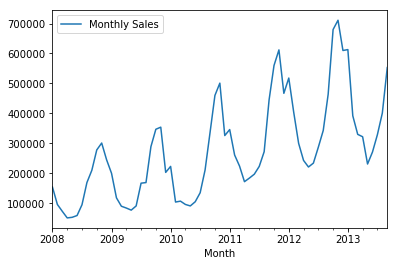

In [104]:
data.plot();

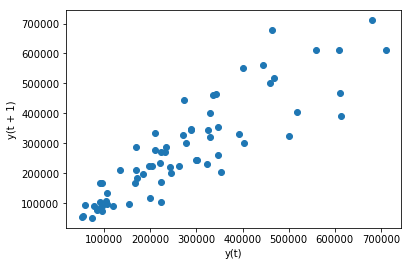

In [105]:
from pandas.plotting import lag_plot
lag_plot(data)
plt.show()

In [106]:
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import autocorrelation_plot, lag_plot
from statsmodels.tsa.stattools import adfuller

def corr_plot(data):
   # autocorrelation_plot(data)
    plot_acf(data,lags=25,zero=False)
    plt.axhline(y=-1.96/np.sqrt(len(data)),linestyle='--',color='gray')
    plt.axhline(y=1.96/np.sqrt(len(data)),linestyle='--',color='gray')

    plot_pacf(data,lags=25, zero=False)
    plt.axhline(y=-1.96/np.sqrt(len(data)),linestyle='--',color='gray')
    plt.axhline(y=1.96/np.sqrt(len(data)),linestyle='--',color='gray')
    
    plt.show()
def decomp_plot(data):
    result=seasonal_decompose(data,model='additive')
    result.plot()
    print(result)
    
def adf_test(data):
    result=adfuller(data['Monthly Sales'])
    dfoutput = pd.Series(result[0:4], index=['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in result[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput) 

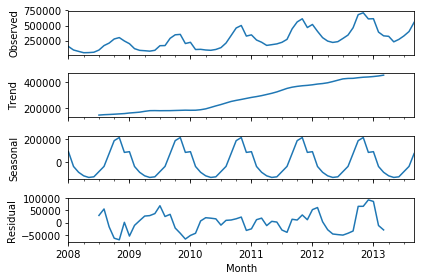

In [107]:
decomp_plot(data)

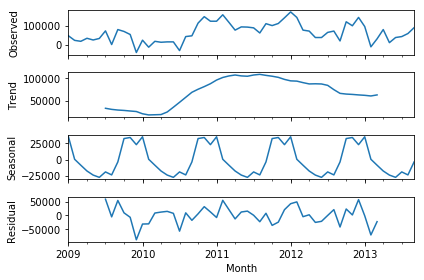

In [108]:
#apply differencing
seasonal_diff=data.diff(12)
seasonal_diff=seasonal_diff.dropna()
decomp_plot(seasonal_diff)

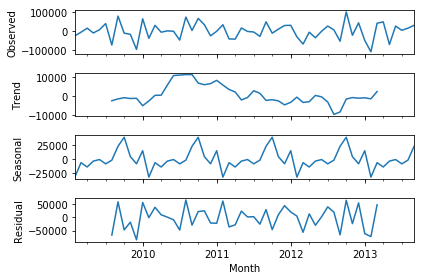

In [109]:
first_diff=seasonal_diff.diff()
first_diff=first_diff.dropna()
decomp_plot(first_diff)

In [110]:
adf_test(data)
adf_test(seasonal_diff)
adf_test(first_diff)

ADF Test Statistic              1.696113
p-value                         0.998119
#Lags Used                     11.000000
Number of Observations Used    57.000000
Critical Value (1%)            -3.550670
Critical Value (5%)            -2.913766
Critical Value (10%)           -2.594624
dtype: float64
ADF Test Statistic             -3.472630
p-value                         0.008718
#Lags Used                      0.000000
Number of Observations Used    56.000000
Critical Value (1%)            -3.552928
Critical Value (5%)            -2.914731
Critical Value (10%)           -2.595137
dtype: float64
ADF Test Statistic            -9.976818e+00
p-value                        2.166597e-17
#Lags Used                     0.000000e+00
Number of Observations Used    5.500000e+01
Critical Value (1%)           -3.555273e+00
Critical Value (5%)           -2.915731e+00
Critical Value (10%)          -2.595670e+00
dtype: float64


notice the p-value<=0.05 meaning its statistically significant and not just a fluke.
ADF test with value less than 0 means its significant and stagnant. This rejects the null hypothesis(that its not stagnant) and is therefore the alternate hypothesis(stagnant)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A12232F1D0>]], dtype=object)

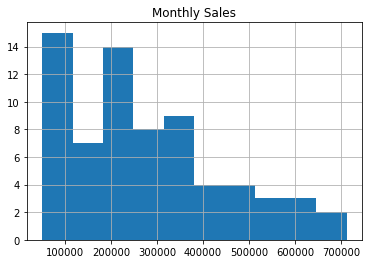

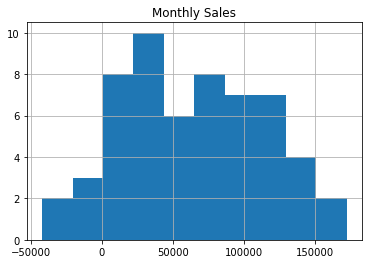

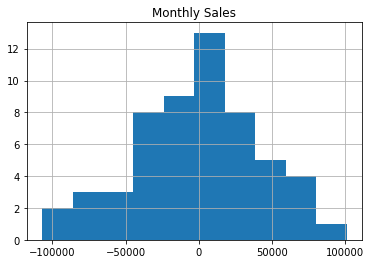

In [111]:
data.hist()
seasonal_diff.hist()
first_diff.hist()

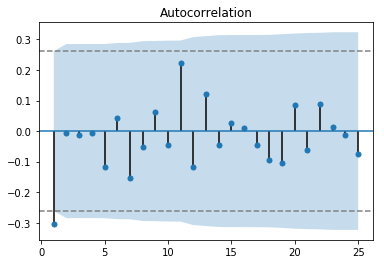

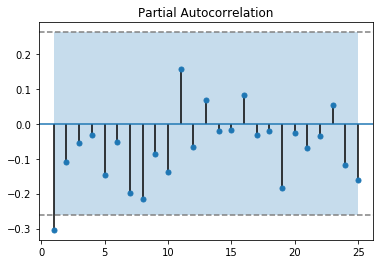

In [112]:
corr_plot(first_diff)

In [113]:
train_data=data.loc[data.index<='2013-05-01']
test_data=data.loc[data.index>'2013-05-01']

In [114]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
model=SARIMAX(train_data,order=(0,1,1),seasonal_order=(0,1,0,12))
results=model.fit()
print(results.summary())

                                 Statespace Model Results                                 
Dep. Variable:                      Monthly Sales   No. Observations:                   65
Model:             SARIMAX(0, 1, 1)x(0, 1, 0, 12)   Log Likelihood                -628.091
Date:                            Mon, 19 Mar 2018   AIC                           1260.181
Time:                                    14:08:25   BIC                           1264.530
Sample:                                01-01-2008   HQIC                          1261.897
                                     - 05-01-2013                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.1862      0.101     -1.838      0.066      -0.385       0.012
sigma2      1.818e+09   2.89e-12   

C:\Users\ndrs\Anaconda3\lib\site-packages\numpy\linalg\linalg.py:1487: RuntimeWarning: divide by zero encountered in true_divide
  return s[..., 0]/s[..., -1]


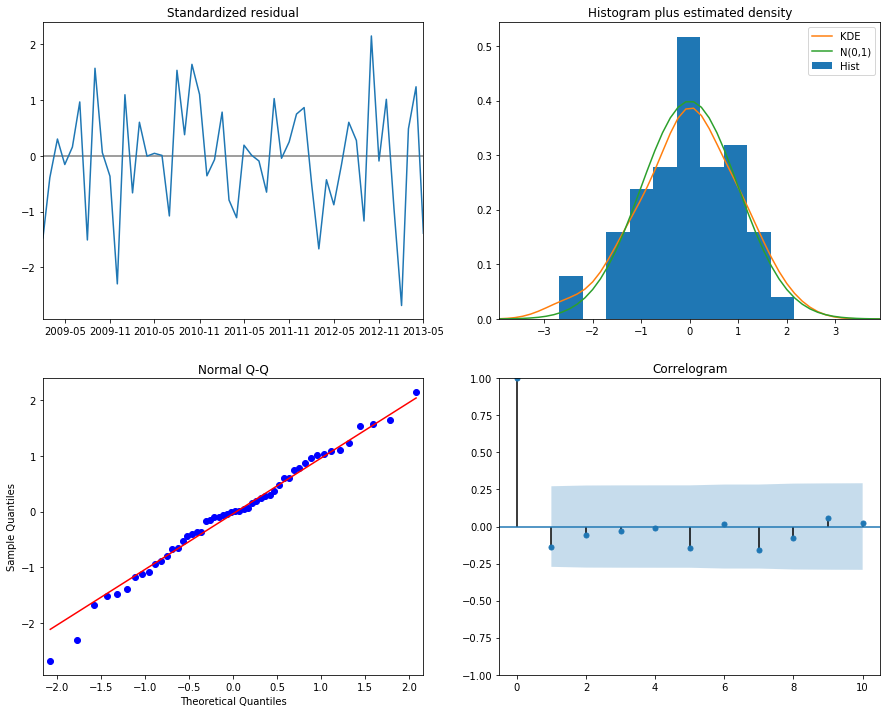

In [115]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

The plot shows us that the risiduals are normally distributed. Normal distribution suggests that the seasonal terms have been fully optimized and there is no indication that it needs to be further improved

In [116]:
from statsmodels.tools.eval_measures import rmse,meanabs
from sklearn.metrics import explained_variance_score,mean_absolute_error,mean_squared_error,r2_score

def acc_measures(data):

    n_data=data[data['Forecast'].notnull()]
    y_true=n_data['Monthly Sales']
    y_pred=n_data['Forecast']
    RMSE=rmse(y_true,y_pred)
    MAE=mean_absolute_error(y_true,y_pred)
    R2=r2_score(y_true, y_pred)
    MAPE=np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print(' ERROR MEASURES ')
    print('Root Mean Squared Error: ', RMSE)
    print('Mean Absolute Error: ', MAE)
    print('Mean Absolute Percent Error: ', MAPE)
    print('R2 score: ', R2)

Model results based on manual analysis of lag
 ERROR MEASURES 
Root Mean Squared Error:  40881.1961829
Mean Absolute Error:  35482.7028472
Mean Absolute Percent Error:  8.447863260242514
R2 score:  0.849985665118


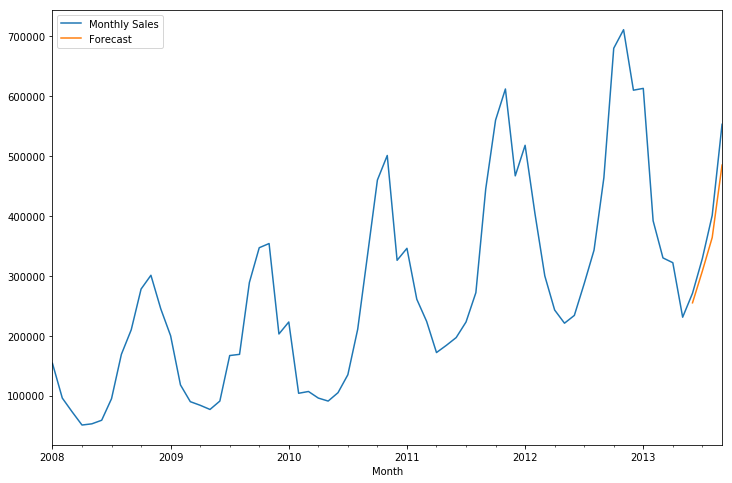

In [117]:
print('Model results based on manual analysis of lag')
manual_data=data.copy()
manual_data['Forecast']=results.forecast(steps=4)
manual_data.plot(figsize=(12,8))
acc_measures(manual_data)
#print(data)

***grid search** Test

In [18]:
import itertools
import warnings


p = d = q = range(0, 3)

pdq = list(itertools.product(p, d, q))

seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

warnings.filterwarnings("ignore") 


arima_res= list()

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = SARIMAX(train_data,order=param, seasonal_order=param_seasonal,
                  enforce_stationarity=False, enforce_invertibility=False)

            results = mod.fit()
            data_c=data
            data_c['Forecast']=results.forecast(steps=4)
            res=results.forecast(steps=4)
            data_c=data_c[data_c['Forecast'].notnull()]
            y_true=data_c['Monthly Sales']
            y_pred=data_c['Forecast']
            RMSE=rmse(y_true,y_pred)
            MAE=mean_absolute_error(y_true,y_pred)
            MAPE=np.mean(np.abs((y_true - y_pred) / y_true)) * 100
            arima_res.append([param, param_seasonal, results.aic,RMSE,MAE,MAPE])
        except:
            continue
arima_res=pd.DataFrame(arima_res,columns=['param','param_seasonal','AIC','RMSE','MAE','MAPE'])
arima_res=arima_res.sort_values(by=['RMSE','MAE','MAPE'],ascending=True)
arima_res.head(10)

,param,param_seasonal,AIC,RMSE,MAE,MAPE
322,"(2, 0, 0)","(1, 0, 1, 12)",1262.665579,3109.962889,2948.322415,0.746915
79,"(0, 1, 1)","(2, 0, 1, 12)",995.757541,3763.643003,3492.899859,0.937683
178,"(1, 0, 1)","(1, 0, 1, 12)",1266.096910,4006.269002,3343.131145,1.023928
340,"(2, 0, 1)","(1, 0, 1, 12)",1264.257162,4227.409055,3487.630366,1.079853
412,"(2, 1, 2)","(1, 0, 1, 12)",1217.291741,4244.682399,3657.982662,1.078671
394,"(2, 1, 1)","(1, 0, 1, 12)",1241.496398,5467.580239,4701.581445,1.121250
250,"(1, 1, 2)","(1, 0, 1, 12)",1216.586597,5513.353307,5006.569693,1.273050
97,"(0, 1, 2)","(2, 0, 1, 12)",999.932588,6073.754671,4895.882436,1.520096
358,"(2, 0, 2)","(1, 0, 1, 12)",1242.892837,6104.669641,5783.474225,1.647880
196,"(1, 0, 2)","(1, 0, 1, 12)",1241.651596,6292.906393,5929.299514,1.683073


                                 Statespace Model Results                                 
Dep. Variable:                      Monthly Sales   No. Observations:                   65
Model:             SARIMAX(2, 0, 0)x(1, 0, 1, 12)   Log Likelihood                -626.333
Date:                            Mon, 19 Mar 2018   AIC                           1262.666
Time:                                    13:16:18   BIC                           1273.538
Sample:                                01-01-2008   HQIC                          1266.955
                                     - 05-01-2013                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5442      0.562      0.968      0.333      -0.557       1.646
ar.L2          0.2054      0.577   

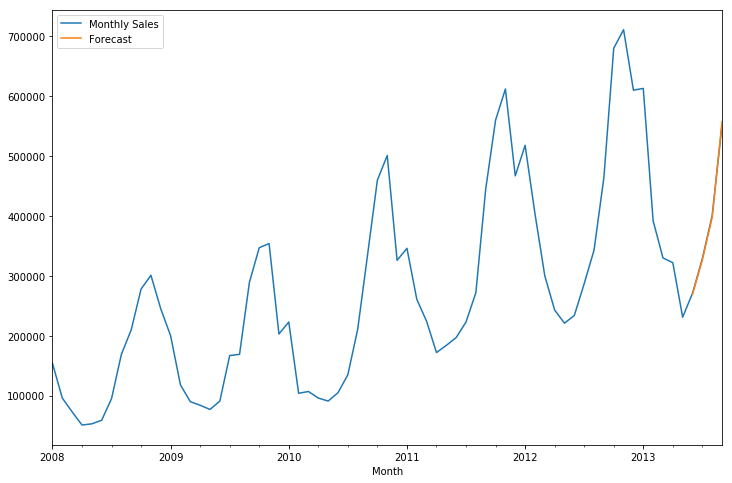

In [63]:
model=SARIMAX(train_data,order=(2,0,0),seasonal_order=(1,0,1,12),enforce_stationarity=False,enforce_invertibility=False)
#model=SARIMAX(train_data,order=(0,0,1),seasonal_order=(0,1,1,12),enforce_stationarity=False,enforce_invertibility=False)
results=model.fit()
print(results.summary())
summ_data=data.copy()
summ_data['Forecast']=results.forecast(steps=4)
summ_data.plot(figsize=(12,8))
acc_measures(summ_data)

In [97]:
f_data=full_data
model=SARIMAX(f_data,order=(2,0,0),seasonal_order=(1,0,1,12),enforce_stationarity=False,enforce_invertibility=False)
results=model.fit()
print(results.summary())

                                 Statespace Model Results                                 
Dep. Variable:                      Monthly Sales   No. Observations:                   69
Model:             SARIMAX(2, 0, 0)x(1, 0, 1, 12)   Log Likelihood                -675.460
Date:                            Mon, 19 Mar 2018   AIC                           1360.921
Time:                                    14:04:37   BIC                           1372.092
Sample:                                01-01-2008   HQIC                          1365.353
                                     - 09-01-2013                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5420      0.577      0.940      0.347      -0.588       1.672
ar.L2          0.2105      0.590   

Final Forecast


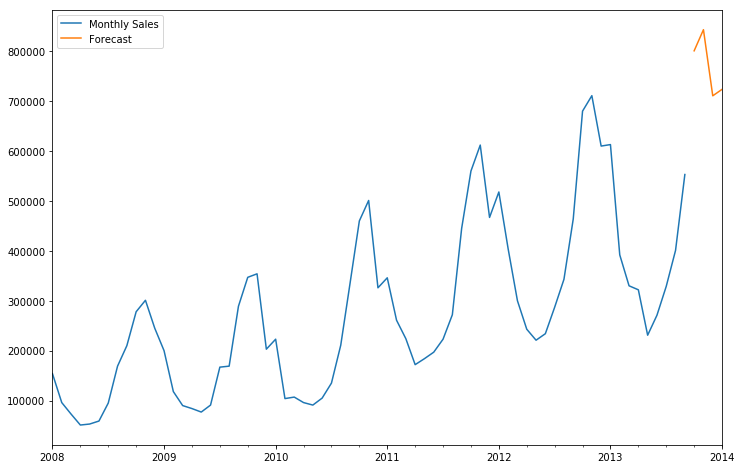

2013-10-01    800865.874837
2013-11-01    843216.628513
2013-12-01    710723.921976
2014-01-01    723678.522286
Freq: MS, Name: Forecast, dtype: float64


In [98]:
print('Final Forecast')
f_values=results.forecast(steps=4)
f_values.rename('Forecast',inplace=True)

f_data=pd.concat((f_data,f_values),axis=1)
f_data.plot(figsize=(12,8))
plt.show()
print(f_values)